# Agglomerative Clustering

In [1]:
import numpy as np

class AggloCluster:
    def __init__(self, linkage="single"):
        self.linkage = linkage
        self.X = None
    
    def __call__(self, X):
        return self.cluster(X)
    
    def cluster(self, X):
        self.X = X
        all_k_clusters = [list([i] for i in range(X.shape[0]))]
        for _ in range(X.shape[0]-1):
            all_k_clusters.append(self.nearestClustersMerged(all_k_clusters[-1].copy()))
        return all_k_clusters
    
    def nearestClustersMerged(self, clusters) -> list:
        closestClusterPair = None
        closestClusterDistance = None
        for i in range(len(clusters)-1):
            for j in range(i+1, len(clusters)):
                linkage_distance = self.distance(clusters[i], clusters[j])
                if closestClusterDistance == None or linkage_distance < closestClusterDistance:
                    closestClusterPair = (i, j)
                    closestClusterDistance = linkage_distance
        clusters[closestClusterPair[1]] = clusters[closestClusterPair[0]] + clusters[closestClusterPair[1]]
        clusters.pop(closestClusterPair[0])
        return clusters
    
    def distance(self, X_i, X_j) -> float:
        min_distance = None
        for i in X_i:
            for j in X_j:
                distance = np.linalg.norm(self.X[i] - self.X[j])
                if min_distance == None or distance < min_distance:
                    min_distance = distance
        return min_distance

## Agglomerative Clustering

In [2]:
from helpers.GetDatasets import clustering_split
X_train, X_test, y_train, y_test = clustering_split()

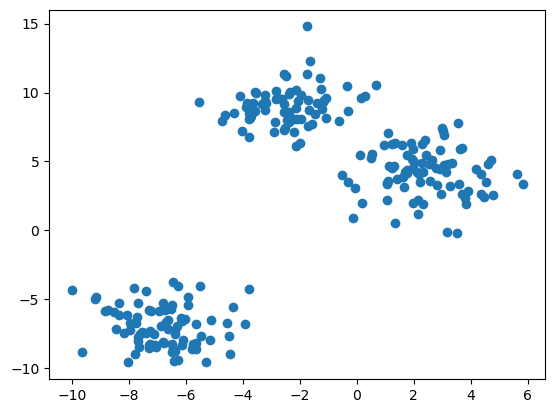

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1])

In [4]:
model = AggloCluster()
preds = model(X_train)

In [9]:
k = 4
k_clusters = preds[-k]
[len(cluster) for cluster in k_clusters]

[1, 76, 81, 82]

C:\Users\Angel\AppData\Local\Temp\ipykernel_13172\3558357473.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("jet", k)


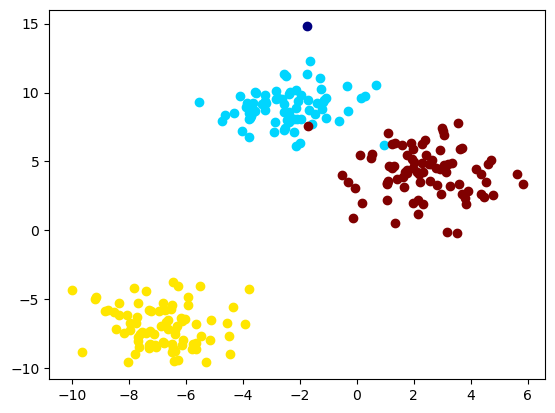

In [10]:
cmap = plt.cm.get_cmap("jet", k)
for i, cluster in enumerate(k_clusters):
    for elem in cluster:
        plt.scatter(X_train[elem, 0], X_train[elem, 1], color=cmap(i))